In [1]:
#PCA 수행을 위해 sklearn 라이브러리에서 PCA 클래스 가져오기
from sklearn.decomposition import PCA

#PCA 수행 전 데이터 스케일링할 도구 가져오기
from sklearn.preprocessing import StandardScaler

#결과 시각화를 위한 라이브러리 가져오기
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
data = pd.read_csv("C:/datasets/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#특성과 레이블 분리
features = data.drop(columns=['Outcome'])
label = data['Outcome']

In [6]:
#StandardScaler 객체 생성
scaler = StandardScaler()
#데이터를 스케일링하여 모델이 다른 범위의 특성 간 균형을 고려
scaled_features = scaler.fit_transform(features)

In [7]:
#PCA를 2개의 주성분으로 축소하도록 설정
pca = PCA(n_components=2)  
#스케일링된 데이터로 PCA 수행하고 주성분 반환
principal_components = pca.fit_transform(scaled_features)

In [8]:
#PCA 결과를 데이터프레임 형태로 변환하고 두 개의 주성분을 PC1, PC2라는 이름으로 저장
pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#주성분과 레이블을 함께 확인하도록 Outcome값을 다시 붙이기 
pca_results['Outcome'] = label

In [9]:
#PC1과 PC2가 데이터 변동성을 얼마나 설명하는지 그 기여도를 계산하여 반환
explained_variance_ratio = pca.explained_variance_ratio_

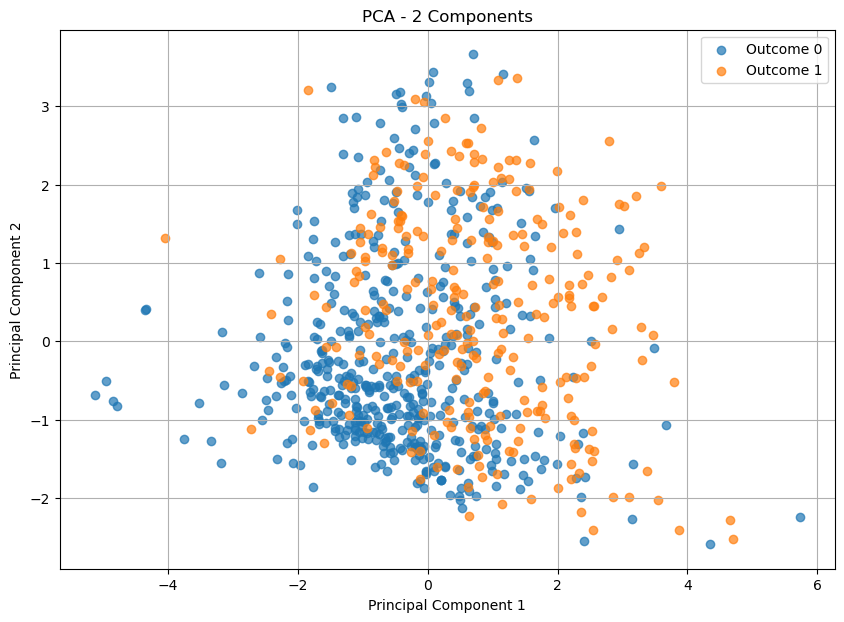

In [12]:
#시각화 그래프 크기 설정
plt.figure(figsize=(10, 7))

#Outcome값 (0 또는 1)에 따라 색상 구분하기 위한 설정
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_results[pca_results['Outcome'] == label] #각 Outcome값별로 데이터 필터링
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Outcome {label}', alpha=0.7) #산점도 출력

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Components')
plt.legend()
plt.grid()
plt.show()